# Worksheet 10

Name:  Yicun Wu
UID: U60263210

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

Yes, this is an example of classification because the task is to predict whether a student will be offered a job or not, which is a binary classification problem.

No, this is not an example of classification because the task is to predict a continuous variable (the number of months it will take for a student to be offered a job), which is a regression problem.

Yes, this is an example of classification because the task is to predict a categorical variable (the number of stars in a Yelp review), which is a classification problem.

No, this is not an example of classification because the task is to predict a count variable (the number of births occurring in a specified minute), which is a count data problem or Poisson regression.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

cross-validation. Cross-validation involves splitting the dataset into two or more subsets: a training set, which is used to train the model, and a validation or test set, which is used to evaluate the model's performance.



c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

undeffit: high bias that did not fit the points a flat line is underfit thats why high bias
overfit: fit too well give high variance, exactly fitting the data which no flexibilty 

### K Nearest Neighbors

In [13]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

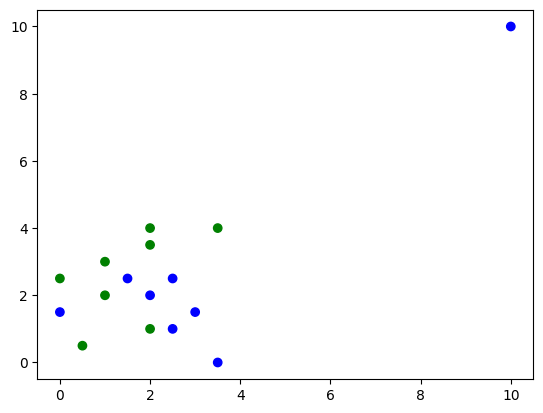

In [14]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

yes there are pts outliers 

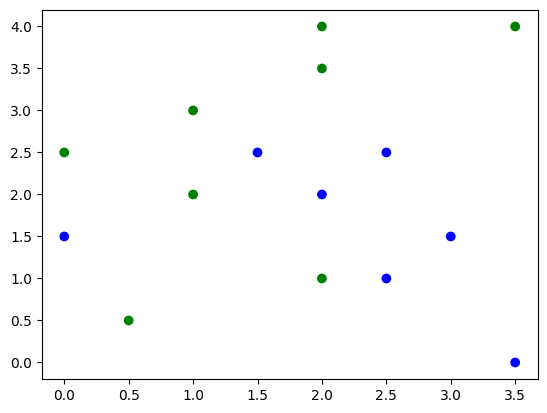

In [15]:
threshold_a = 5
threshold_b = 4

filtered_data = {
    "Attribute A": [],
    "Attribute B": [],
    "Class": []
}

for i in range(len(data["Attribute A"])):
    if data["Attribute A"][i] <= threshold_a and data["Attribute B"][i] <= threshold_b:
        filtered_data["Attribute A"].append(data["Attribute A"][i])
        filtered_data["Attribute B"].append(data["Attribute B"][i])
        filtered_data["Class"].append(data["Class"][i])

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(filtered_data["Attribute A"], filtered_data["Attribute B"], color=colors[filtered_data["Class"]].tolist())
plt.show()


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

yes there was i (0.0, 1.5)

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

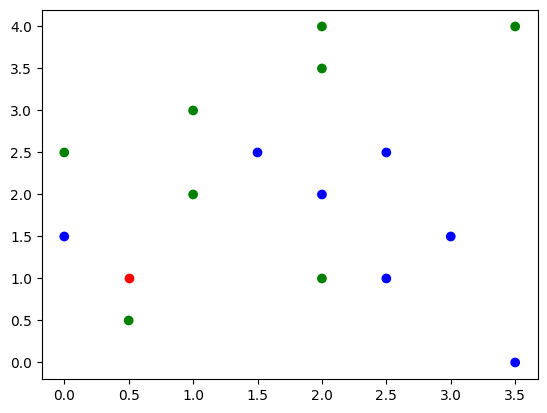

In [16]:
new_point = {
    "Attribute A": 0.5,
    "Attribute B": 1,
}

plt.scatter(filtered_data["Attribute A"], filtered_data["Attribute B"], color=colors[filtered_data["Class"]].tolist())
plt.scatter(new_point["Attribute A"], new_point["Attribute B"], color="red")
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

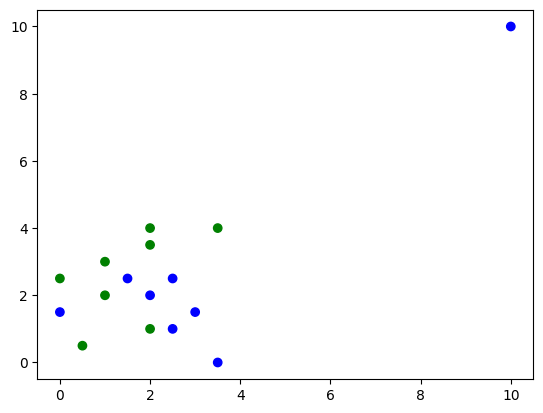

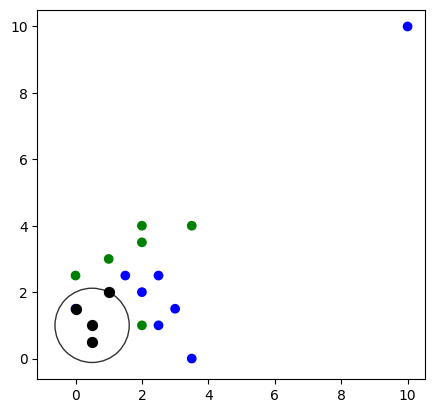

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

df = pd.DataFrame(data)
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(df["Attribute A"], df["Attribute B"], color=colors[df["Class"]].tolist())

def n_closest_to(example, n):
    distances = np.sqrt(np.sum((df[["Attribute A", "Attribute B"]] - example)**2, axis=1))
    closest_indices = np.argsort(distances)[:n]
    closest_points = df[["Attribute A", "Attribute B"]].iloc[closest_indices]
    farthest_distance = max(distances[closest_indices])
    return closest_points, farthest_distance

location = (0.5, 1)
closest_points, farthest_distance = n_closest_to(location, 3)
radius = farthest_distance
_, axes = plt.subplots()
axes.scatter(df["Attribute A"], df["Attribute B"], color=colors[df["Class"]].tolist())
axes.scatter(location[0], location[1], color="k", s=50)
axes.scatter(closest_points["Attribute A"], closest_points["Attribute B"], color="k", s=50)
cir = plt.Circle(location, radius, fill=False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal')
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [19]:
def majority_class(points):
    class_counts = {0: 0, 1: 0}
    for i in range(len(points)):
        class_counts[data["Class"][points[i]]] += 1
    if class_counts[0] > class_counts[1]:
        return 0
    elif class_counts[1] > class_counts[0]:
        return 1
    else:
        # break tie with default class
        return 1

closest_points, _ = n_closest_to(location, 3)
predicted_class = majority_class(closest_points.index.values)
print("Predicted class:", predicted_class)


Predicted class: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [43]:
import numpy as np
import pandas as pd

data = {
    "Attribute A": [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B": [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
}

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def n_closest_to(point, n):
    distances = []
    for i in range(len(data["Attribute A"])):
        example = np.array([data["Attribute A"][i], data["Attribute B"][i]])
        distance = euclidean_distance(example, point)
        distances.append((distance, i))
    distances.sort()
    closest_points = pd.DataFrame([data["Attribute A"][i], data["Attribute B"][i], data["Class"][i]] for _, i in distances[:n])
    return closest_points, distances[:n]

def predict_class(closest_points):
    counts = closest_points.iloc[:, 2].value_counts()
    if len(counts) == 1:
        return counts.index[0]
    elif counts[0] != counts[1]:
        return counts.index[0]
    else:
        return data["Class"][closest_points.index[0]]

def knn(point, k=3):
    closest_points, _ = n_closest_to(point, k)
    prediction = predict_class(closest_points)
    return prediction


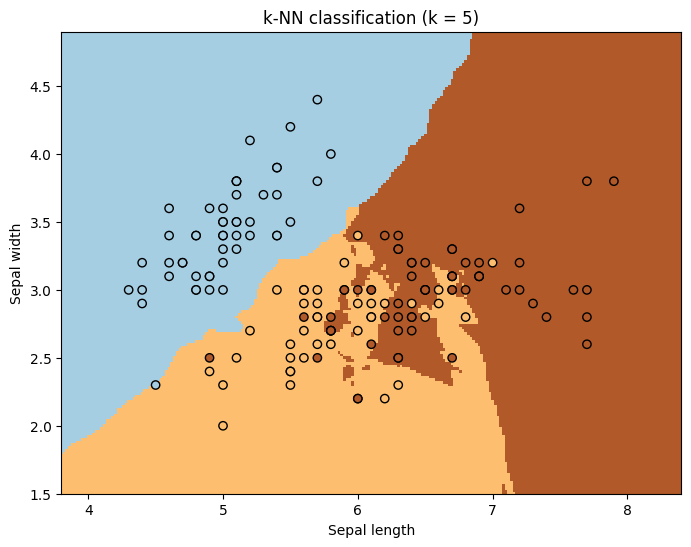

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Create a k-NN classifier
k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X, y)

# Create a meshgrid of points to evaluate the classifier on
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class labels for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k-NN classification (k = %d)" % k)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()
